In [164]:
from pymatgen import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.symmetry.analyzer import SpacegroupOperations
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.core.operations import SymmOp
from pymatgen.phonon.bandstructure import *
from pymatgen.ext.matproj import MPRester
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.phonon.plotter import*
import matplotlib.pyplot as plt
import numpy as np

In [165]:
with MPRester("AzOW60LLLKSgtVAVUq4") as m:
    phonon = m.get_phonon_bandstructure_by_material_id("mp-961678")


# 1. Visualisation du graphe des courbes de dispersion et de la zone de Brillouin

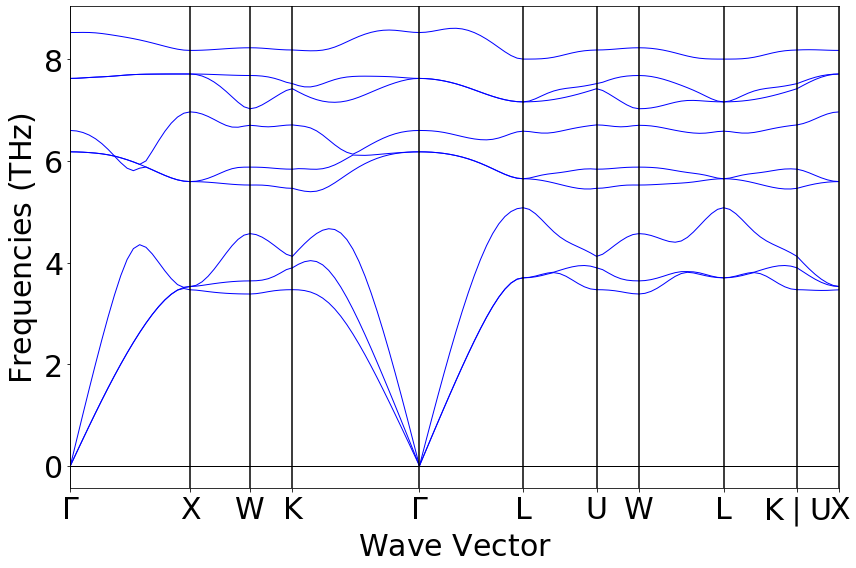

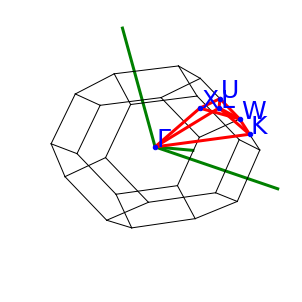

In [166]:
phonon_plot = PhononBSPlotter(phonon) 
phonon_plot.get_plot() 
phonon_plot.plot_brillouin()

# 2. Calcul de la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin

## 2.1. Bandes accoustiques
Les bandes accoustiques sont les bandes où la fréquence du phonon associée est nulle au centre de la zone de Brillouin. Il existe alors 3 directions : $\Gamma-L , K-\Gamma$ et $\Gamma-X.$


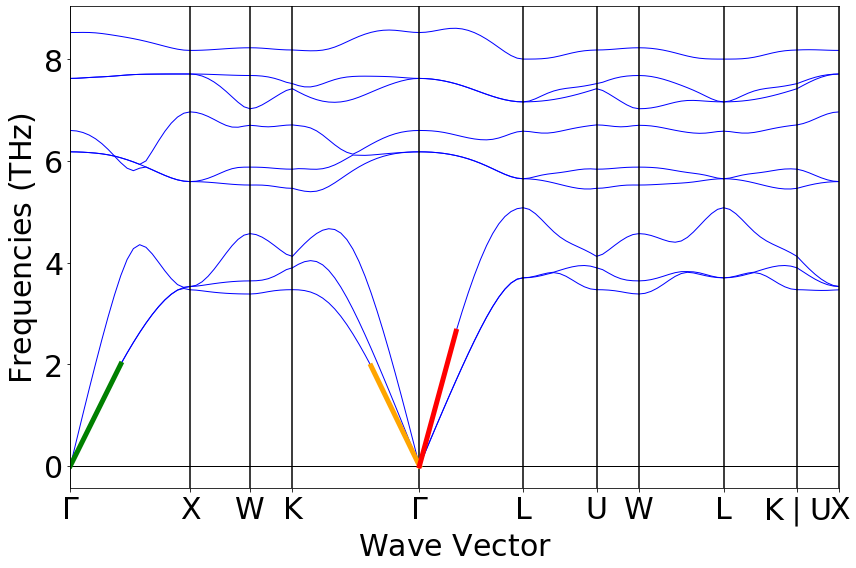

In [167]:
data = phonon_plot.bs_plot_data() 
distances = data.get("distances")
frequency = data.get("frequency")

phonon_plot.get_plot()
# Première pente en vert
plt.plot([distances[0][0],distances[0][0]+distances[0][8]-distances[0][0]],[frequency[0][1][0],frequency[0][1][0]+frequency[0][1][8]-frequency[0][1][0]], color='green', lw=5)
# Deuxième pente en jaune
plt.plot([distances[3][13],distances[3][13]+distances[3][-1]-distances[3][13]],[frequency[3][0][13],frequency[3][0][13]+frequency[3][0][-1]-frequency[3][0][13]], color='orange', lw=5)
# Troisième pente en rouge
plt.plot([distances[4][0], distances[4][0]+distances[4][6]-distances[4][0]],[frequency[4][2][0],frequency[4][2][0]+frequency[4][2][6]-frequency[4][2][0]], color='red', lw=5)



## 2.2. Vitesse du son
Dans un solide, la vitesse de propagation (anisotrope) du son correspond à la propagation d'un phonon dans le réseau réciproque, c'est à dire dans la zone de Brillouin. 

La vitesse du son suit la relation suivante: $v_s = \frac{\partial \omega}{\partial q}$ où $q$ est le vecteur d'onde, $\omega$ la relation de dispersion de notre matériau en posant comme hypothèse que nous sommes dans le cas de grande longueur d'onde ($\lambda$ >>> $a$, $a$ le paramètre de maille).

La vitesse du son se trouve ensuite en prenant la pente des droites. Comme le diagramme nous donne des fréquences en TerraHertz, il va de plus falloir reconvertir cette dernière en Hz (multiplication par $10^{12}$). De plus, la vitesse du son se calcule par rapport à $\omega$ = 2$\pi f$, une multiplication par $2\pi$ est donc nécessaire. Notre vecteur d'onde (actuellement en Angström) est également à modifier étant donné que nous souhaitons une vitesse en [m/s] (multiplication par $10^{-10}$).


In [168]:
print("La vitesse du son de la courbe 1 dans la direction Gamma - X vaut {} m/s.".format(2*np.pi*np.abs((frequency[0][1][1]-frequency[0][1][0])*(10**12))/((distances[0][1]-distances[0][0])*(10**10))))
print("La vitesse du son de la courbe 2 dans la direction K - Gamma vaut {} m/s.".format(2*np.pi*np.abs((frequency[3][0][-1] - frequency[3][0][-2])*(10**12))/((distances[3][-1]-distances[3][-2])*(10**10))))
print("La vitesse du son de la courbe 3 dans la direction Gamma - L vaut {} m/s.".format(2*np.pi*np.abs((frequency[4][2][1]-frequency[4][2][0])*(10**12))/((distances[4][1]-distances[4][0])*(10**10))))

La vitesse du son de la courbe 1 dans la direction Gamma - X vaut 3002.1698161333516 m/s.
La vitesse du son de la courbe 2 dans la direction K - Gamma vaut 3008.8384936291145 m/s.
La vitesse du son de la courbe 3 dans la direction Gamma - L vaut 5412.777493316601 m/s.
